In [29]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import scipy.stats as st

In [49]:
cur_dir = os.path.dirname('__file__')

train = pd.read_csv(os.path.join(cur_dir, "data", "train.csv"))
test = pd.read_csv(os.path.join(cur_dir, "data", "test.csv"))

In [31]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [48]:
def preprocess(df):
    res = df.copy()
    x75, x25 = np.percentile(res.X, [75 ,25])
    xiqr = x75 - x25
    y75, y25 = np.percentile(res.Y, [75 ,25])
    yiqr = x75 - x25
    res = res[res.X < x75 + 3*xiqr]
    res = res[res.Y < y75 + 3*xiqr]
    
    res = res[res.X > x25 - 3*xiqr]
    res = res[res.Y > y25 - 3*xiqr]
    
    return res

In [50]:
train = preprocess(train)

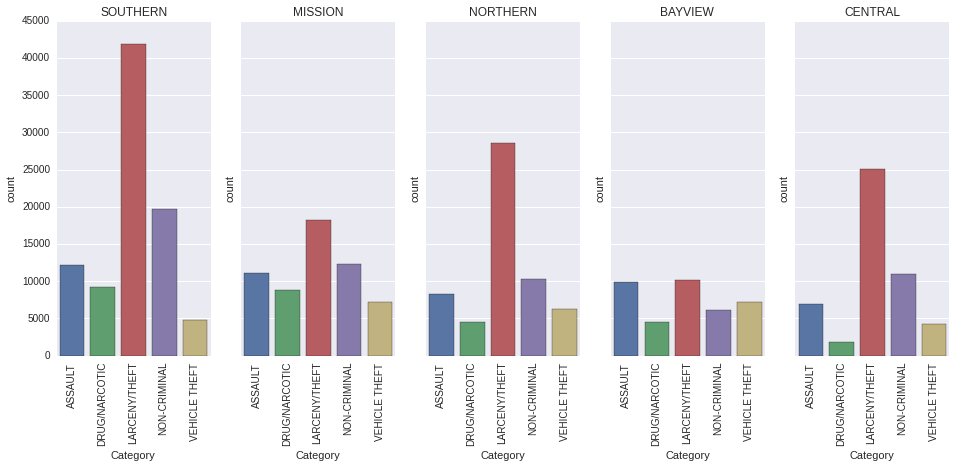

In [32]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)

for i in range(len(most_common_districts)):
    
    subset = train[(train.PdDistrict == most_common_districts[i]) & train.Category.isin(most_common_cats)]
    
    ax = sns.countplot(x="Category", data=subset.sort_values("Category"), ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.gcf().set_size_inches(16, 6, forward=True)


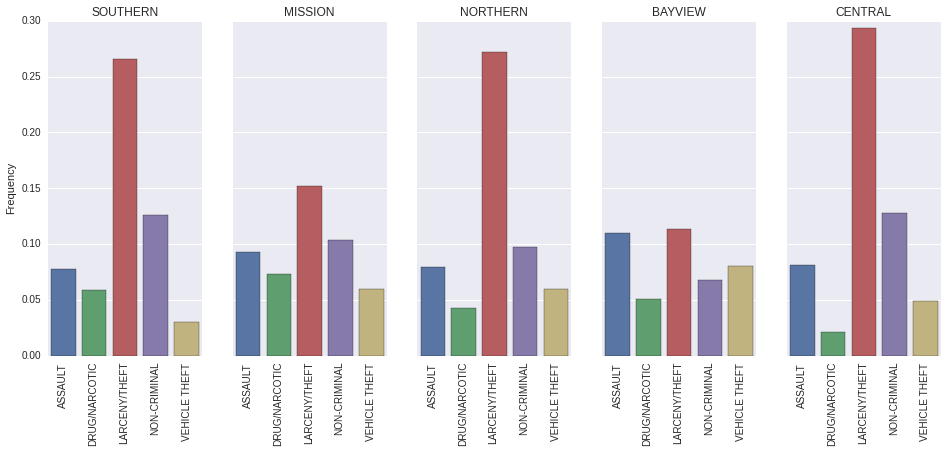

In [33]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)


for i in range(len(most_common_districts)):
    
    subset = train[train.PdDistrict == most_common_districts[i]]
    proportions = (subset.Category.value_counts().astype(float) / len(subset)).loc[most_common_cats]
    proportions = proportions.sort_index()
    
    
    
    ax = sns.barplot(x=proportions.index, y=proportions, ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    ax.set_ylabel("")
    plt.sca(ax)
    plt.xticks(rotation=90)
    
axtuple[0].set_ylabel("Frequency")
plt.gcf().set_size_inches(16, 6, forward=True)


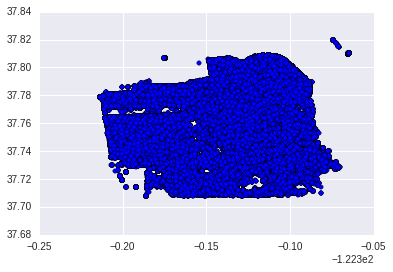

In [51]:
x = train.X
y = train.Y

plt.scatter(x, y)

# # Peform the kernel density estimate
# xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# positions = np.vstack([xx.ravel(), yy.ravel()])
# values = np.vstack([x, y])
# kernel = st.gaussian_kde(values)
# f = np.reshape(kernel(positions).T, xx.shape)

# fig = plt.figure()
# ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# # Contourf plot
# cfset = ax.contourf(xx, yy, f, cmap='Blues')
# ## Or kernel density estimate plot instead of the contourf plot
# #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# # Contour plot
# cset = ax.contour(xx, yy, f, colors='k')
# # Label plot
# ax.clabel(cset, inline=1, fontsize=10)
# ax.set_xlabel('Y1')
# ax.set_ylabel('Y0')

# plt.show()